# 3-1장. 시카고 샌드위치 맛집 분석
<분석 목적>
- 인터넷에서 직접 "웹 스크래핑"한 데이터를 사용하여, 시카고 샌드위치 맛집 리스트를 정리해보려 한다
    - 시카고 샌드위치 맛집 리스트를 정리하는데 그치지 않고, 나아가 지도에 각 맛집을 표기해보는 작업까지 수행해 줄 것이다!
- 인터넷에서 웹 페이지의 내용을 가져오는 ```BeautifulSoup```이라는 모듈을 사용할 것이다

<시카고 매거진 홈페이지 설명>
- 시카고의 베스트 샌드위치 가게를 소개하고 있는 "시카고 매거진 홈페이지"에서 정보를 가져올 것이다
     - https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/
- 홈페이지를 살펴보면, *메뉴의 이름* 과 *가게의 이름* 이 나와있다
- *Read More* 이라는 부분을 클릭하면, 시카고 매거진에서 각 가게를 리뷰한 페이지로 넘어가진다

## [참고] Beautiful Soup 기초
- 시카고 샌드위치 맛집 분석에 앞서, ```BeautifulSoup```에 대해 간단히 학습하는 시간을 가져보려 한다
- ```BeautifulSoup```는 HTML과 XML 파일에서 데이터를 읽어내는 파이썬 라이브러리이다
- 웹 데이터를 가져오는 ```BeautifulSoup``` 모듈 기초를 간단한 실습을 통해 배워보고자 한다
    - 실습에 사용한 html 파일: "03. test_first.html"
    
<참고>
- HTML 기초 지식 참고 사이트: http://webberstudy.com/html-css/html-1/basic-knowledge/

In [1]:
from bs4 import BeautifulSoup

**다운받은 html 파일 읽어오기**
- ```open``` 명령에 읽기 옵션('r')을 주고 읽어오면 된다
- 읽은 tml 페이지의 내용을 전체 다 보고 싶은 경우, 아래와 같이 ```prettify()```라는 옵션을 사용하면 들여쓰기까지 되서 보기 좋게 불러와준다
    - ```prettify()```는 BeautifulSoup에서 parsing 처리한 parser 트리를 유니코드 형태로 리턴해주는 함수

In [2]:
page = open("../data/03. test_first.html", 'r').read()
soup = BeautifulSoup(page, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Very Simple HTML Code by PinkWink
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    Happy PinkWink.
    <a href="http://www.pinkwink.kr" id="pw-link">
     PinkWink
    </a>
   </p>
   <p class="inner-text second-item">
    Happy Data Science.
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    All I need is Love.
   </b>
  </p>
 </body>
</html>


**soup이라는 변수에서 한 단계 아래에서 포함된 태그들을 알고 싶은 경우, ```children```속성을 사용**

In [3]:
list(soup.children)

['html',
 '\n',
 <html>
 <head>
 <title>Very Simple HTML Code by PinkWink</title>
 </head>
 <body>
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>
 </body>
 </html>]

**soup는 문서 전체를 저장한 변수. 때문에 그 안에서 html 태그에 접속하고 싶으면 다음과 같이 접근!**

In [4]:
html = list(soup.children)[2]
html

<html>
<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
</html>

In [5]:
list(html.children)

['\n',
 <head>
 <title>Very Simple HTML Code by PinkWink</title>
 </head>,
 '\n',
 <body>
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>
 </body>,
 '\n']

**본문으로 흔히 보게 되는 부분인 body 태그의 내용**
- 이와 같이 children과 parent를 이용해서 태그를 조사할 수 있다

In [6]:
body = list(html.children)[3]
body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

- 아래처럼 한 번에 바로 찾을 수도 있다

In [7]:
soup.body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

In [8]:
list(body.children)

['\n',
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>,
 '\n',
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 '\n',
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>,
 '\n']

In [9]:
len(list(body.children))

7

**body 태그 안에 children의 리스트를 확인**
- 앞서 수행한 코드처럼 단계별로 접근하고, 다시 그 구조를 코드 속에 담아두는 것은 체계적으로 생각하고 접근할 수 있는 장점이 있다
- 그러나 복잡하고 큰 크기의 페이지를 접근하기에는 어려움이 있다
- 만약 접근해야 할 태그를 알고있다면, ```find```나 ```find_all```명령을 많이 사용한다

- 모든 p 태그를 찾기

In [10]:
soup.find_all('p')

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>,
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>,
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

- 제일 첫 번째 p 태그 찾기

In [11]:
soup.find_all('p', class_ = 'outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

- p 태그의 class가 outer-text인 것 찾기

In [12]:
soup.find_all(class_ = 'outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

- class 이름으로만 outer-text 찾기

In [13]:
soup.find_all(id = "first")

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>]

- id가 first인 태그들 찾기

In [14]:
soup.find('p')

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

**```find``` 명령은 제일 처음 나타난 태그만 찾아준다**

**따라서 그 다음 태그만 찾고 싶은 경우에는 다른 방법이 필요하다**

In [15]:
soup.head

<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>

- soup의 head 다음에 줄바꿈 문자(\n)가 있다

In [16]:
soup.head.next_sibling

'\n'

- soup의 head 앞에 줄바꿈 문자(\n)가 있다

In [17]:
soup.head.previous_sibling

'\n'

In [18]:
soup.head.next_sibling.next_sibling

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

- head와 같은 위치에 있던 body 태그로 접근

In [19]:
body.p

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

- ```next_sibling```을 두 번 걸면, 그 다음 p 태그로 이동할 수 있다

In [20]:
body.p.next_sibling.next_sibling

<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>

**```get_text()```명령으로 태그 안에 있는 텍스트만 가지고 올 수 있다**

In [21]:
for each_tag in soup.find_all('p'):
    print(each_tag.get_text())


                Happy PinkWink.
                PinkWink


                Happy Data Science.
                Python



                Data Science is funny.
            



                All I need is Love.
            



- body 전체에서 ```get_text()```를 하면, 태그가 있던 자리는 줄바꿈(\n)이 표시되고 전체 텍스트를 보여준다

In [22]:
body.get_text()

'\n\n\n                Happy PinkWink.\n                PinkWink\n\n\n                Happy Data Science.\n                Python\n\n\n\n\n                Data Science is funny.\n            \n\n\n\n                All I need is Love.\n            \n\n'

**클릭 가능한 링크를 의미하는 a 태그 찾기**

In [23]:
links = soup.find_all('a')
links

[<a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>,
 <a href="https://www.python.org" id="py-link">Python</a>]

- ```href``` 속성을 찾으면 링크 주소를 얻을 수 있다

In [24]:
for each in links:
    href = each['href']
    text = each.string
    print(text + ' -> ' + href)

PinkWink -> http://www.pinkwink.kr
Python -> https://www.python.org


## 크롬 개발자 도구를 이용해서 원하는 태그 찾기
- 웹 페이지의 태그를 beautiful soup의 결과만 보면서 확인할 수는 없다
- 원하는 곳의 태그가 무엇인지 확인하는 방법 중 간편한 방법!

### "네이버 금융" 사이트에서 특정 글자 가져오기
- 홈페이지의 '시장 지표' 부분에 들어가서, '미국의 환전 고시 환율' 글자 부분을 가져와보겠다
    - 크롬에서 해당 홈페이지에 들어가서 '개발자 도구'를 확인
    - 확인해 본 결과, 최종적으로 ```span 태그```의 ```value```라는 ```class```를 얻으면 된다!!

In [25]:
from urllib.request import urlopen

In [26]:
url = "https://finance.naver.com/marketindex/"
page = urlopen(url)

soup = BeautifulSoup(page, "html.parser")

print(soup.prettify())

<script language="javascript" src="/template/head_js.nhn?referer=info.finance.naver.com&amp;menu=marketindex&amp;submenu=market">
</script>
<script src="/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript">
</script>
<script src="/js/jindo.1.5.3.element-text-patch.js" type="text/javascript">
</script>
<div id="container" style="padding-bottom:0px;">
 <script language="JavaScript" src="/js/flashObject.js?20200422112105">
 </script>
 <div class="market_include">
  <div class="market_data">
   <div class="market1">
    <div class="title">
     <h2 class="h_market1">
      <span>
       환전 고시 환율
      </span>
     </h2>
    </div>
    <!-- data -->
    <div class="data">
     <ul class="data_lst" id="exchangeList">
      <li class="on">
       <a class="head usd" href="/marketindex/exchangeDetail.nhn?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
        <h3 class="h_lst">
         <span class="blind">
          미국 USD
         </span>
        </h3>
 

- ```span 태그```의 ```value```라는 ```class```를 얻기 위해, ```find_all``` 명령을 사용
- 결과가 '리스트'로 반환되기 때문에 첫 번째 요소 값을 선택하도록 지정

In [27]:
soup.find_all('span', 'value')[0].string

'1,237.70'

**위 결과를 보면, "*네이버 금융 --> 시장 지표 --> 미국 USD 환전 고시 환율*" 가격이 출력된 것을 확인할 수 있다**
- 웹 스크래핑을 할 홈페이지에서 '개발자 도구'를 확인하여 접근해야 할 태그를 파악한다면, 위와 같이 쉽게(?) 홈페이지의 정보들을 가져올 수 있다!!

## 실전: 시카고 샌드위치 맛집 소개 사이트에 접근하기
- 홈페이지에서 '개발자 도구'를 확인한 결과, 내가 사용해야 할 태그는 ```div 태그```에 class ```sammy``` 이거나 ```sammyListing``` 일 것이다

**우선, 전체 html 코드를 불러오기**


<!DOCTYPE html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  The 50 Best Sandwiches in Chicago |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness" name="description"/>
<!-- <meta name="description" content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness"> -->
<meta content="sandwiches, dining" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" rel="dns-
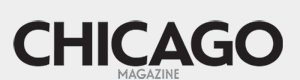

In [28]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

# url_base와 url_sub으로 나눠놓은 이유는 코드가 너무 길어짐을 방지하기 위해서!
url_base = 'http://www.chicagomag.com'
url_sub = '/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
url = url_base + url_sub

html = urlopen(url)
soup = BeautifulSoup(html, "html.parser")

soup

**```find_all``` 명령을 이용해서, 홈페이지에서 확인한 태그(```div 태그```에 class ```sammy```)를 찾기**

In [29]:
print(soup.find_all('div', 'sammy'))

[<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">2</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">3</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
Xoco<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">4</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Al

- 내가 찾고자 하는 내용이 맞는지 더 확실하게 확인해보기 위해, ```len``` 명령으로 길이를 확인!
    - 길이가 50 으로 나왔는데, 시카고 매거진의 기사 제목에서 알 수 있듯이 시카고 샌드위치 맛집 50 곳에 대한 정보를 보여주므로, 일단 정확하게 찾은 것 같다!

In [30]:
len(soup.find_all('div', 'sammy'))

50

- 내가 찾고자 했던 내용이 맞다!!

In [31]:
print(soup.find_all('div', 'sammy')[0])

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>


### 접근한 웹 페이지에서 원하는 데이터 추출하고 정리하기
**이제 ```div``` 의 ```sammy``` 태그에서 우리가 원하는 정보를 얻는 과정을 진행하겠다**

- ```find_all``` 명령으로 찾은 결과가 아래와 같은 형태로 출력된다면, 그 변수에 다시 태그로 찾는 ```find```, ```find_all``` 명령을 사용할 수 있다

In [32]:
tmp_one = soup.find_all('div', 'sammy')[0]
type(tmp_one)

bs4.element.Tag

In [33]:
tmp_one.find(class_ = 'sammyRank')

<div class="sammyRank">1</div>

- 랭킹 확인

In [34]:
tmp_one.find(class_ = 'sammyRank').get_text()

'1'

- ```sammyListing```을 얻으면, *메뉴 이름* 과 *가게 이름* 을 얻을 수 있다
    - 그러나 *메뉴 이름* 과 *가게 이름* 이 같이 붙어있다
    - 때문에 밑에서 "정규식"을 사용해서 분리시켜줄 것이다!

In [35]:
tmp_one.find(class_ = 'sammyListing').get_text()

'BLT\r\nOld Oak Tap\nRead more '

- a 태그에서 href 정보를 가지고 클릭했을 때, 연결될 주소 저장하기

In [36]:
tmp_one.find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

**정규식을 사용한 '메뉴 이름'과 '가게 이름'을 분할**
- 위의 결과를 보면, \n 또는 \r\n 의 패턴으로 분할시켜줘야 함을 알 수 있다
    - 따라서 split 기준을 '```\n|\r\n```'으로 설정!!

In [37]:
import re # 정규식을 쓰기 위해 필요한 모듈!

tmp_string = tmp_one.find(class_ = 'sammyListing').get_text()

re.split(('\n|\r\n'), tmp_string)

print(re.split(('\n|\r\n'), tmp_string)[0]) # 메뉴 이름
print(re.split(('\n|\r\n'), tmp_string)[1]) # 가게 이름

BLT
Old Oak Tap


**샌드위치 맛집 리스트 50개 각각에 대해서 절대경로로 잡힌 url은 그대로 두고, 상대경로로 잡힌 url은 절대경로로 변경!**
- ```urllib``` 에 있는 ```urljoin``` 이라는 명령을 사용

In [38]:
from urllib.parse import urljoin

rank = []
main_menu = []
cafe_name = []
url_add = []

list_soup = soup.find_all('div', 'sammy')

for item in list_soup:
    rank.append(item.find(class_ = 'sammyRank').get_text()) # 맛집 랭크 순위
    
    tmp_string = item.find(class_ = 'sammyListing').get_text()
    
    main_menu.append(re.split(('\n|\r\n'), tmp_string)[0]) # 메뉴 이름
    cafe_name.append(re.split(('\n|\r\n'), tmp_string)[1]) # 가게 이름
    
    url_add.append(urljoin(url_base, item.find('a')['href']))

In [39]:
rank[:5]

['1', '2', '3', '4', '5']

In [40]:
main_menu[:5]

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']

In [41]:
cafe_name[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

In [42]:
url_add[:5]

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

- 4개의 변수 길이를 확인해보니 모두 50개로, 위에서 처리해준 작업이 잘 수행됐음을 알 수 있다

In [43]:
len(rank), len(main_menu), len(cafe_name), len(url_add)

(50, 50, 50, 50)

**pandas 라이브러리를 활용해서 4개의 리스트 합치기**
- 하나의 데이터 프레임으로 만들어주기!

In [44]:
import pandas as pd

data = {'Rank':rank, 'Menu':main_menu, 'Cafe':cafe_name, 'URL':url_add}
df = pd.DataFrame(data)
df.head()

,Rank,Menu,Cafe,URL
0,1,BLT,Old Oak Tap,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Fried Bologna,Au Cheval,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Woodland Mushroom,Xoco,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Roast Beef,Al’s Deli,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,PB&L,Publican Quality Meats,http://www.chicagomag.com/Chicago-Magazine/Nov...


- 칼럼들의 순서를 보기좋게 다시 정렬

In [45]:
df = pd.DataFrame(data, columns = ['Rank', 'Cafe', 'Menu', 'URL'])
df.head()

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


**위의 과정들을 거쳐 만들어진 df 데이터를, csv 파일로 내보내는 코드는 따로 실행하지 않겠다**

**(이미 data 폴더에 해당 데이터가 존재하기 때문)**

In [46]:
# df.to_csv("../data/03. best_sandwiches_list_chicago.csv", sep = ',', encoding = 'UTF-8')

### 다수의 웹 페이지에 자동으로 접근해서 원하는 정보 가져오기
- 시카고의 베스트 샌드위치 가게 50개의 세부 메뉴를 설명하는 곳을 클릭하면, 각각 또 다른 매거진 기사로 연결된다
- 앞에서 수행한대로 해당 페이지에 들어가서 '개발자 도구'를 사용하여 태그를 찾으면, ```p 태그```에 ```addy``` class 인 것을 알 수 있다!

In [47]:
df = pd.read_csv('../data/03. best_sandwiches_list_chicago.csv', index_col = 0)
df.head()

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


**위 표에서 URL 컬럼에 있는 내용을 50개 읽어서 각 페이지에서 정보 가져오기**
- 가져올 정보 리스트: *가게 주소, 대표 샌드위치 가격, 가게 전화번호*

- 먼저 첫 번째 URL에 대해서 해당 작업을 연습해보고, 그 후에 for문을 사용하여 50개에 대해 일괄적으로 적용시키겠다!

In [48]:
df['URL'][0]

'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'


<!DOCTYPE html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  1. Old Oak Tap BLT |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="“Truly inspired.”" name="description"/>
<!-- <meta name="description" content="&#8220;Truly inspired.&#8221;"> -->
<meta content="" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"/>
<link href="//ping.chartbeat.net" rel="dns-prefetch"/>
<link h
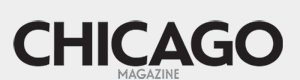

In [49]:
html = urlopen(df['URL'][0])
soup_tmp = BeautifulSoup(html, 'html.parser')
soup_tmp

- p 태그에 addy class를 찾아보니, 내가 원하는 정보가 모두 있다!

In [50]:
print(soup_tmp.find('p', 'addy')) # p 태그에 addy class

<p class="addy">
<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em></p>


- 위의 정보를 텍스트로 가지고 와서, 빈 칸을 기준으로 나눠주겠다

In [51]:
price_tmp = soup_tmp.find('p', 'addy').get_text()
price_tmp

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

In [52]:
price_tmp.split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

In [53]:
# 1. 가격
price_tmp.split()[0][:-1] # 맨 뒤에 "."을 제거해주기 위해 [:-1]을 추가로 넣어줌

'$10'

In [54]:
# 2. 주소 (join 명령을 사용해서 주소 정보 합쳐주기)
" ".join(price_tmp.split()[1:-2])

'2109 W. Chicago Ave.,'

**이제 연습 과정을 마치고, 반복문을 사용하여 50개의 페이지에 대해서 위에서 했던 작업들을 수행해주자!!**

<참고>
- 50개의 페이지에 대해서 반복문을 수행하면 꽤 시간이 걸린다
- 때문에 ```tqdm``` 모듈을 사용해서, 반복문이 얼마나 수행되었는지에 대한 "상태 진행바"를 만들어줘보겠다!

In [55]:
from tqdm import tqdm_notebook # "진행 상태바"를 만들기 위한 모듈!

price = []
address = []

for n in df.index[:50]:
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html, 'lxml')
    
    gettings = soup_tmp.find('p', 'addy').get_text()
    
    price.append(gettings.split()[0][:-1]) # 가격
    address.append(" ".join(gettings.split()[1:-2])) # 주소

In [56]:
price

['$10',
 '$9',
 '$9.50',
 '$9.40',
 '$10',
 '$7.25',
 '$16',
 '$10',
 '$9',
 '$17',
 '$11',
 '$5.49',
 '$14',
 '$10',
 '$13',
 '$4.50',
 '$11.95',
 '$11.50',
 '$6.25',
 '$15',
 '$5',
 '$6',
 '$8',
 '$5.99',
 '$7.52',
 '$11.95',
 '$7.50',
 '$12.95',
 '$7',
 '$21',
 '$9.79',
 '$9.75',
 '$13',
 '$7.95',
 '$9',
 '$9',
 '$8',
 '$8',
 '$7',
 '$6',
 '$7.25',
 '$11',
 '$6',
 '$9',
 '$5.49',
 '$8',
 '$6.50',
 '$7.50',
 '$8.75',
 '$6.85']

**<주의>**
- 주소 출력 결과를 보면, "Multiple"이라고 되어 있는 부분들이 있다
- 마지막에 50개의 맛집 리스트를 시각화 할 때, 이 부분들은 제외시키고 시각화 해 줄 것이다!! 

In [57]:
address

['2109 W. Chicago Ave.,',
 '800 W. Randolph St.,',
 '445 N. Clark St.,',
 '914 Noyes St., Evanston,',
 '825 W. Fulton Mkt.,',
 '100 E. Walton',
 '1639 S. Wabash Ave.,',
 '2211 W. North Ave.,',
 '3619 W. North Ave.,',
 '3267 S. Halsted St.,',
 '2537 N. Kedzie Blvd.,',
 'Multiple',
 '3124 N. Broadway,',
 '3455 N. Southport Ave.,',
 '2657 N. Kedzie Ave.,',
 '1120 W. Grand Ave.,',
 '1141 S. Jefferson St.,',
 '333 E. Benton Pl.,',
 '1411 N. Wells St.,',
 '1747 N. Damen Ave.,',
 '3209 W. Irving Park',
 'Multiple',
 '5347 N. Clark St.,',
 '2954 W. Irving Park Rd.,',
 'Multiple',
 '191 Skokie Valley Rd., Highland Park,',
 'Multiple',
 '1818 W. Wilson Ave.,',
 '2517 W. Division St.,',
 '218 W. Kinzie',
 'Multiple',
 '1547 N. Wells St.,',
 '415 N. Milwaukee Ave.,',
 '1840 N. Damen Ave.,',
 '1220 W. Webster Ave.,',
 '5357 N. Ashland Ave.,',
 '1834 W. Montrose Ave.,',
 '615 N. State St.,',
 'Multiple',
 '241 N. York Rd., Elmhurst,',
 '1323 E. 57th St.,',
 '655 Forest Ave., Lake Forest,',
 'Hotel L

In [58]:
len(price), len(address), len(df)

(50, 50, 50)

**이제 df(데이터 프레임)에 위에서 만들어진 'price'와 'address'를 변수로 추가해주겠다!**

In [59]:
df['Price'] = price
df['Address'] = address

df = df.loc[:, ['Rank', 'Cafe', 'Menu', 'Price', 'Address']] # 칼럼들의 순서 정렬
df.set_index('Rank', inplace = True) # Rank 변수를 index로 지정
df.head()

,Cafe,Menu,Price,Address
Rank,,,,
1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,"
2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,"
3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,"
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston,"
5,Publican Quality Meats,PB&L,$10,"825 W. Fulton Mkt.,"


**위의 과정들을 거쳐 만들어진 df 데이터를, csv 파일로 내보내는 코드는 따로 실행하지 않겠다**

**(이미 data 폴더에 해당 데이터가 존재하기 때문)**

In [60]:
# df.to_csv('../data/03. best_sandwiches_list_chicago2.csv', sep = ',', encoding = 'UTF-8')

**<여기까지 수행해 준 작업 요약>**
- 시카고 매거진의 샌드위치 맛집을 소개하는 페이지를 기본으로 두고, 그 페이지에서 링크된 50개의 페이지까지 접속해서 원하는 정보를 가져왔다
- 그리고 가져온 정보들을 원하는 형태로 가공해주는 작업까지 처리해주었다

### 맛집 위치를 지도에 표시하기

In [61]:
import folium
import googlemaps
import pandas as pd
import numpy as np

In [62]:
# index_col = 0 으로 설정해서 Rank 변수를 index로 지정
df = pd.read_csv('../data/03. best_sandwiches_list_chicago2.csv', index_col = 0)
df.head()

,Cafe,Menu,Price,Address
Rank,,,,
1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,"
2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,"
3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,"
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston,"
5,Publican Quality Meats,PB&L,$10,"825 W. Fulton Mkt.,"


In [63]:
gmaps_key = "*************************************" # 2장에서 사용한 API 키 값을 입력
gmaps = googlemaps.Client(key = gmaps_key)

**50개의 맛집에 대해서 위도 및 경도 정보를 받아오기**
- 아래의 코드는 2장에서 자세하게 설명했으므로 여기서는 설명 생략!

In [64]:
lat = []
lng = []

for n in tqdm_notebook(df.index):
    # 앞서 언급했듯이 주소가 "Multiple"로 되어있는 것들은 제외시킨다
    if df['Address'][n] != 'Multiple':
        target_name = df['Address'][n] + ',' + 'Chicago'
        gmaps_output = gmaps.geocode(target_name)
        location_output = gmaps_output[0].get('geometry')
        lat.append(location_output['location']['lat'])
        lng.append(location_output['location']['lng'])
    
    # 주소가 "Multiple"로 되어있는 것들은 NaN 값을 넣어준다
    else:
        lat.append(np.nan)
        lng.append(np.nan)

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [65]:
len(lat), len(lng)

(50, 50)

- 위에서 만들어준 lat, lng 리스트를 'lat', 'lng'라는 이름의 변수로 df(데이터 프레임)에 추가해주기
    - 이제 df(데이터 프레임)에 위도 및 경도 정보까지 넣어주었으므로, ```folium``` 을 사용하여 시각화 할 준비 완료!!

In [66]:
df['lat'] = lat
df['lng'] = lng
df.head()

,Cafe,Menu,Price,Address,lat,lng
Rank,,,,,,
1,Old Oak Tap,BLT,$10,"2109 W. Chicago Ave.,",41.895605,-87.679961
2,Au Cheval,Fried Bologna,$9,"800 W. Randolph St.,",41.884658,-87.647667
3,Xoco,Woodland Mushroom,$9.50,"445 N. Clark St.,",41.890523,-87.630783
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston,",42.058322,-87.683748
5,Publican Quality Meats,PB&L,$10,"825 W. Fulton Mkt.,",41.886600,-87.648451


**```folium```을 사용하여 지도에 50개의 맛집들을 시각화!!**
- 50개 맛집의 위도 및 경도를 지도에 표기

In [67]:
mapping = folium.Map(location = [df['lat'].mean(), df['lng'].mean()],
                     zoom_start = 11)

for n in df.index:
    # 앞서 언급했듯이 주소가 "Multiple"로 되어있는 것들은 제외시킨다
    if df['Address'][n] != 'Multiple':
        folium.Marker([df['lat'][n], df['lng'][n]], # '위도 및 경도' 정보 표기
                      popup = df['Cafe'][n]).add_to(mapping) # popup 옵션으로 '가게 이름' 표기

mapping

**<분석을 마치며...>**
- 이번 챕터에서는 ```BeautifulSoup``` 라이브러리를 사용해서 인터넷의 정보를 가져오는 "웹 스크래핑(크롤링)" 작업을 수행해보았다
    - 단순히 한 페이지만 읽는 것이 아니라, 메인 페이지에 연결된 다른 페이지들도 모두 대상으로 해서 "크롤링"을 수행했다
- HTML에 대한 지식이 없어서 그런지 크롤링을 할 때 좀 힘들었다...(아직 배워야 할게 많구나 ㅜㅜ)
    - 이번 분석을 수행하면서 HTML에 대해서 공부해야겠다는 생각을 하게 되었다 ^^..